In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [14]:
df = pd.read_csv('./ratings.dat', names=['user', 'movie', 'rating', 'date'], delimiter='::', engine= 'python')

In [15]:
print('Rows:', df.shape[0], '; Columns:', df.shape[1], '\n')
from datetime import datetime
#df.date = pd.to_datetime(df.date)
df = df[['movie', 'user', 'rating', 'date']]
print(df.head(5))

Rows: 10000054 ; Columns: 4 

   movie  user  rating       date
0    122     1     5.0  838985046
1    185     1     5.0  838983525
2    231     1     5.0  838983392
3    292     1     5.0  838983421
4    316     1     5.0  838983392


In [4]:
df.to_csv("data10m.csv", index = False)

In [5]:
# it returns True for a row that has atleast one Nan value.
null_bool = df.isnull().any(axis = 1)

# Removing those duplicates ( if any)
df.drop(df[null_bool].index, inplace=True)
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  0


In [6]:
dup_bool = df.duplicated(['movie','user','rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


In [10]:
print("Total data ")
print("-"*50)
print("\nTotal No of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.user)))
print("Total No of movies  :", len(np.unique(df.movie)))

Total data 
--------------------------------------------------

Total No of ratings : 10000054
Total No of Users   : 69878
Total No of movies  : 10677


Text(0.5, 0, 'Rating (Out of 5)')

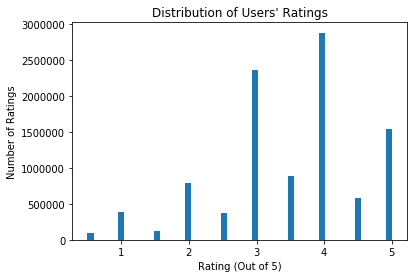

In [11]:
df.rating.plot.hist(bins=50)
plt.title("Distribution of Users' Ratings")
plt.ylabel('Number of Ratings')
plt.xlabel('Rating (Out of 5)')

In [12]:
ratings_movie_summary = df.groupby('movie')['rating'].agg(['count', 'mean', 'std'])
ratings_movie_summary.head(10)

,count,mean,std
movie,,,
1,26449,3.928769,0.896315
2,12032,3.208070,0.951328
3,7790,3.150385,1.005159
4,1764,2.860544,1.087675
5,7135,3.077435,0.964899
6,13696,3.813011,0.888124
7,8064,3.365017,0.956471
8,899,3.131257,0.973772
9,2518,2.996823,0.962853


In [13]:
ratings_user_summary = df.groupby('user')['rating'].agg(['count', 'mean', 'std'])
ratings_user_summary.head(10)

,count,mean,std
user,,,
1,22,5.000000,0.000000
2,20,3.200000,0.894427
3,33,3.939394,0.747470
4,38,4.026316,1.150484
5,87,3.850575,1.062344
6,42,3.928571,1.112958
7,109,3.926606,0.954584
8,800,3.398125,0.768552
9,24,4.000000,1.276885
